In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import linregress
import statsmodels.formula.api as smf
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sklearn.__version__
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import resample
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-data-test/bank-additional-full-singlequotes-test.csv


# Project: Marketing Analysis

Bank Marketing Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).The overall problem we are tackling is that many banks want to know what type of customers would want to avail a campaign offer so that it will make them understand what type of users they should invest time into. We have set a baseline to first analyze the data through explanatory analysis, by explaining the data we set to analyze the problem statement by performing different classifiers, experimenting different ways to improve performance of those classifiers which can help in the prediction the campaign offers. The initial dataset is the banking dataset with 41188 rows and 21 features. 

Data Set Information: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Source: Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

# Executive Summary Analysis report: 
I have grouping the age variable into different intervals of age groups and checking which interval age group subscribes more to term deposit.
1. we can see our dataset is not balanced looking at the target variable. The number of negative class('no') is almost 8 times the positive class('yes').
2. From the analysis we have predicted that young people are Millennials that who are currently between 25 and 40 years old are tending towards acceptance of    term deposits. 
3.From the scatter plot diagram we find out that the campiange was trageted mostly between 25 - 60 and most effective campaign run between 1 - 10 calls, so    if the calls are made for marketing the product more than 10 time and less than 1 it loss it effect on clients.
4. From the boxplot we can predict that it is effective if you can spend time with client between 6 - 10mins to market the product. too less or too        long can be demotivating client to accept the product.

***Machine learning prediction:***

I have featured importance method for tree-based models( Decision tree and random forest). Decision tree classifiers tend to overfit very easily by memorizing the training data so to reduce the overfitting I chose random forest the analysis and prediction report is as below: 

5. False Positive In ROC curve of random classifier, means the client do NOT SUBSCRIBED to term deposit, but the model thinks he did.
   False Negative, means the client SUBSCRIBED to term deposit, but the model said he dont.
   My understanding about the analysis:
   Poor Performance- because we think that we already have that client but we dont and maybe we lost him in other future campaings
   Relatively Good -The second its not good but its ok, we have that client and in the future we'll discovery that in truth he's already our client
6. For all NEGATIVE(0) PREDICTIONS by our model, how much we predict correct ? 
   other way to understand, our model pointed 6739 + 175 = 6914 clients that didin't subscribe(0), and our model predict 97% correct or 6739 correct and 175    incorrect.
7. For all POSITIVE(1) PREDICTIONS by our model, how much we predict correct ?
   other way to understand, our model pointed 365 + 1623 = 1988 clients that subscribe(1), and our model predict 82% correct or 253 correct and 116 incorrect

Note:
The ROC curve of a random classifier with the random performance level (as shown below) always shows a straight line. This random classifier ROC curve is considered to be the baseline for measuring the performance of a classifier. Two areas separated by this ROC curve indicates an estimation of the performance level—good or poor. 
ROC curves that fall under the area at the top-left corner indicate good performance levels, whereas ROC curves fall in the other area at the bottom-right corner indicate poor performance levels. An ROC curve of a perfect classifier is a combination of two straight lines both moving away from the baseline towards the top-left corner.
Although the theoretical range of the AUC ROC curve score is between 0 and 1, the actual scores of meaningful classifiers are greater than 0.5, which is the AUC ROC curve score of a random classifier.

In [2]:
bank = pd.read_csv('/kaggle/input/bank-data-test/bank-additional-full-singlequotes-test.csv')
#Converting dependent variable categorical to dummy
y = pd.get_dummies(bank['y'], columns = ['y'], drop_first = True)
yA = y
#y = y.drop('yes', axis = 1)

bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


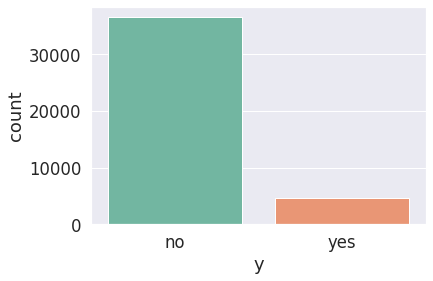

In [3]:
# How many people(client) have subscribed to a term deposit? 
sns.set(font_scale=1.5)
countplt=sns.countplot(x='y', data=bank, palette ='Set2')
plt.show()

# Finding
we can see our dataset is not balanced looking at the target variable. The number of negative class('no') is almost 8 times the positive class('yes').

In [4]:
# count for which marital status are high in proportion: 
bank.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [5]:
# Expressing counts as proportions: 
bank.marital.value_counts(normalize = True)

married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64

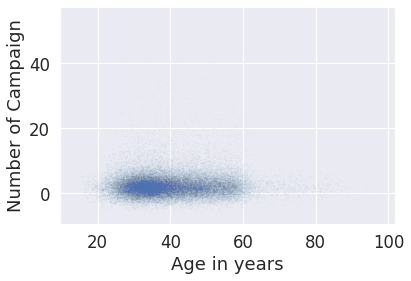

In [6]:
# Question: what age group were targeted for campaign and how many time campaign done to accept term deposit? 
age_jitter = bank.age + np.random.normal(0, 2, size = len(bank))
campaign_jitter = bank.campaign + np.random.normal(0, 2, size = len(bank))
plt.plot(age_jitter,campaign_jitter, 'o', markersize = 1, alpha = 0.02)
plt.xlabel ('Age in years')
plt.ylabel ('Number of Campaign')
plt.show()

# Finding
We can see that the campiange was trageted mostly between 25 - 60 and most effective campaign run between 1 - 10 so if the calls are made for marketing the product more than 10 time it loss it effect on clients. 

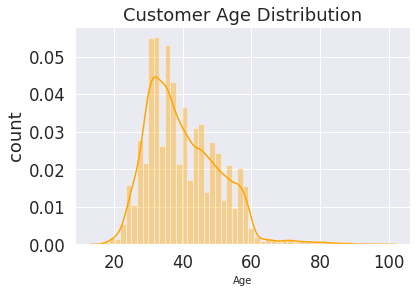

In [7]:
#Distribution plot for age column to see which age group have subscribe the term deposit
sns.distplot(bank['age'], color = 'orange')
plt.title('Customer Age Distribution', fontsize = 18)
plt.xlabel('Age', fontsize = 10)
plt.ylabel('count')
plt.show()

# Finding
By looking at the propotion tables and above histogram we see that the married between age 25 and 55  years old people are more likely to subscribed for term deposit.

<AxesSubplot:title={'center':'duration'}, xlabel='[y]'>

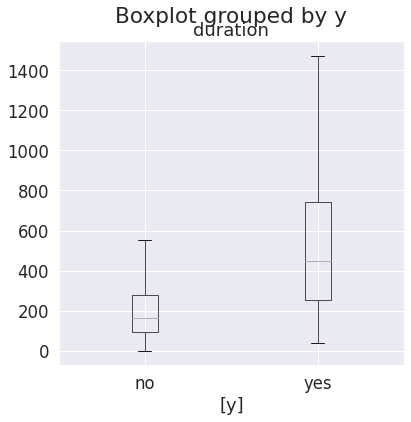

In [8]:
#Relationship between duration and decision to sign up for the term deposit
bank[['duration', 'y']].boxplot(by=['y'], sym ='', figsize = [6, 6])

# finding ( please note that duration is in seconds) 
From the above boxplot we can predict that it is effective if you can spend time with client between 6 - 10mins to market the product. too less or too long can be demotivating client to accept the product. 

# Spliting data for Classification 

In [9]:
# Bank client data Analysis and Categorical Variables
bank_client = bank.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [10]:
# CONVERT COLUMNS TO CONTINUOUS
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

In [11]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [12]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


In [13]:
# Related with the last contact of the current campaign
# Slicing DataFrame to treat separately, make things more easy
bank_related = bank.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [14]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week']) 

In [15]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);

In [16]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


In [17]:
#Social and economic context attributes
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [18]:
#other attributes
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [19]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [20]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(41188, 20)

In [21]:
#IMBALANCED DATASET FIX
bank_final1 = pd.concat([bank_final, y], axis = 1)
df_majority = bank_final1[bank_final1['yes'] == 0]
df_minority = bank_final1[bank_final1['yes'] == 1]



In [22]:
#IMBALANCED DATASET FIX
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= int(4640*2),    
                                 random_state=123) 

In [23]:
#IMBALANCED DATASET FIX
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
y_new = df_upsampled['yes']

In [24]:
#5.2. Train Test DATASET FIX
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop('yes', axis = 1), y_new, test_size = 0.1942313295, random_state = 101)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [25]:
len(X_test)

8902

In [26]:
len(X_train)

36926

# Decision tree Prediction Model

In [27]:
from sklearn import tree
model = tree.DecisionTreeClassifier()


In [28]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
model.score(X_test,y_test)

0.9263086946753538

# RandomForest Classifier

In [30]:

#Note: Why ensemble? ensemble is a term used when you are using multiple algorithms to predict the outcomes ( we are building multiple decision trees and taking majority vote)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200, n_jobs=2, random_state = 12)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=2, scoring = 'accuracy').mean())

In [31]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier'],
                'Score':  [RFCCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,0.937822


In [32]:
rfc.score(X_test, y_test)

0.9392271399685463

In [33]:
y_predicted = rfc.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[6737,  367],
       [ 174, 1624]])

Text(58.5, 0.5, 'Truth')

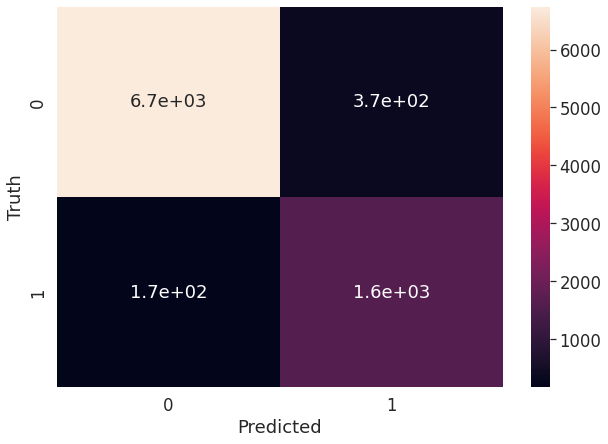

In [35]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
# Precision 0 
print('Precision 0 : ',round(6739 / (6739 + 175),2))

Precision 0 :  0.97


# Analysis for Negative (0)
For all NEGATIVE(0) PREDICTIONS by our model, how much we predict correct ?

other way to understand, our model pointed 6739 + 175 = 6914 clients that didin't subscribe(0), and our model predict 97% correct or 6739 correct and 175 incorrect

In [37]:
print('Precision 1 : ',round(1623 / (1623 + 365),2))

Precision 1 :  0.82


# Analysis For Positive (1)
For all POSITIVE(1) PREDICTIONS by our model, how much we predict correct ?

other way to understand, our model pointed 365 + 1623 = 1988 clients that subscribe(1), and our model predict 82% correct or 253 correct and 116 incorrect

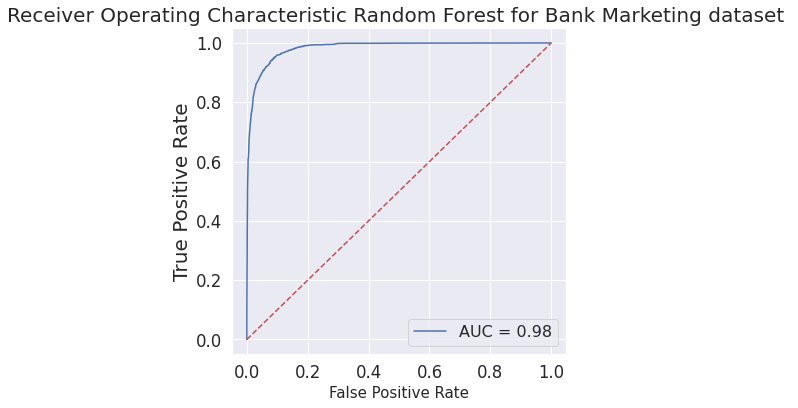

In [38]:
from sklearn import metrics
fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest for Bank Marketing dataset ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

# Comparing the experience of conducting the analyses between Excel BTA 350 and Python BTA 319

Both Excel and Python have their place with certain applications. Excel is a great entry-level tool and is a quick-and-easy way to analyse a dataset.
However I find Python efficient and scalable when it comes to large dataset like this marketing one compare to Excel. It's faster than Excel for data pipelines, automation and calculating complex equations and algorithms. In Excel I found it diffcult to handle this large dataset to analysis and dive deeper into the data I user Power BI to get rich information about the data verse python is way easier to load the data and with the very few lines of codes I can understand the data and clean the data faster then Excel.Python collaborate with other libraraies and packages very well to put finding into the visualizes and advance analytics and for prediction like Machine learning. On top of that Python is free!I believe and experienced that in technology era, with large datasets and more complex analytics and automation, Python provides the tools, techniques and processing power that Excel, in many instances, lacks. After all, Python is more powerful, faster, capable of better data analysis and it benefits from a more inclusive, collaborative support system.